# Introduction:
## Project1: "Regression for Numeric Data "

The goal is to develop a number of regression models using the entire data science project lifecycle. EDA, feature selection, data preparation (including the use of attribute transforms as necessary), and a comprehensive assessment of model performance indicators should all be included in your work performance.

Team members :
- Mahesh Rajendra
- Mamatha Singh
- Bhavitha Bojja
- Nandini Srirapu

## Plan / Methodology:
1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Wrangling** : In this phase, raw data is transformed and structured into a more usable format for analysis and modeling.
 - Corrected data types and formate of data by removing invalid symobls

3. **Exploratory Data Analysis** : In this phase, the data is examined to understand its key characteristics and reveal patterns and relationships. This involves techniques such as visualizations and statistical summaries. The insights gained from this analysis assist in subsequent phases by guiding in feature selection and helping to choose the most appropriate algorithms.

4. **Data Preparation** : In this phase we treated missing values with K-NN imputer, treated outliers with mupltiple methods and choosed the best.

5. **Feature Selection** : Did variance threshold and VIF to pick best features and did PCA for dimensionality reduction.

6. **Prepped Data Review** : After getting the good, we did EDA to see the differece.

7. **Model Development and Evaluation**: Built 2 Poission Regression models, 2 Negative Binomial Regression models and 2 Multi Linear regression and and evaluated by Summary.

8. **Select Models** : After considering all the Matrics Second model of Negative binomial regressor is selected as best performing than other models and made predictions on test data.

## Data Summery:
- Dataset comprised of information pertaining to
NY State High School graduation metrics for the 2018-2019 school year. The dataset is sourced from the NY
State Education Department (NYSED): https://data.nysed.gov/downloads.php

- The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State
school district and associated subgroupings/categorizations of high school students who had been enrolled for
at least 4 years as of the end of the 2018-2019 school year

-  The
response variable you will be modeling is the data set’s “dropout_cnt” attribute


## Data Acquistion

In [207]:
import pandas as pd

In [208]:
df = pd.read_csv('https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/refs/heads/main/NY_State_High_School.csv')

In [209]:
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [211]:
# List of count columns (these should be converted to int)
count_columns = [
    'aggregation_index', 'nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt',
    'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt',
    'still_enr_cnt', 'ged_cnt', 'dropout_cnt'
]

# List of percentage columns (these should be converted to floats)
percentage_columns = [
    'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
    'still_enr_pct', 'ged_pct', 'dropout_pct'
]


# Convert count columns to integers (ignoring NaNs)
df[count_columns] = df[count_columns].apply(pd.to_numeric, errors='coerce').fillna(value=pd.NA).astype('Int64')

# Remove '%' from percentage columns
df[percentage_columns] = df[percentage_columns].apply(lambda x: x.str.rstrip('%'))

# Convert percentage columns to floats (ignoring NaNs)
df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce').fillna(value=pd.NA).astype(float)


In [212]:
df.isnull().sum()

,0
report_school_year,0
aggregation_index,0
aggregation_type,0
aggregation_name,0
nrc_code,0
nrc_desc,0
county_code,0
county_name,0
nyc_ind,0
membership_desc,0


## Exploratory Data Analysis

## Univariate Analysis

In [213]:
! pip install squarify

In [214]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[Text(0, 0, 'Average Needs'),
 Text(1, 0, 'Rural High Needs'),
 Text(2, 0, 'Low Needs'),
 Text(3, 0, 'Urban-Suburban High Needs'),
 Text(4, 0, 'NYC'),
 Text(5, 0, 'Buffalo  Rochester  Yonkers  Syracuse')]

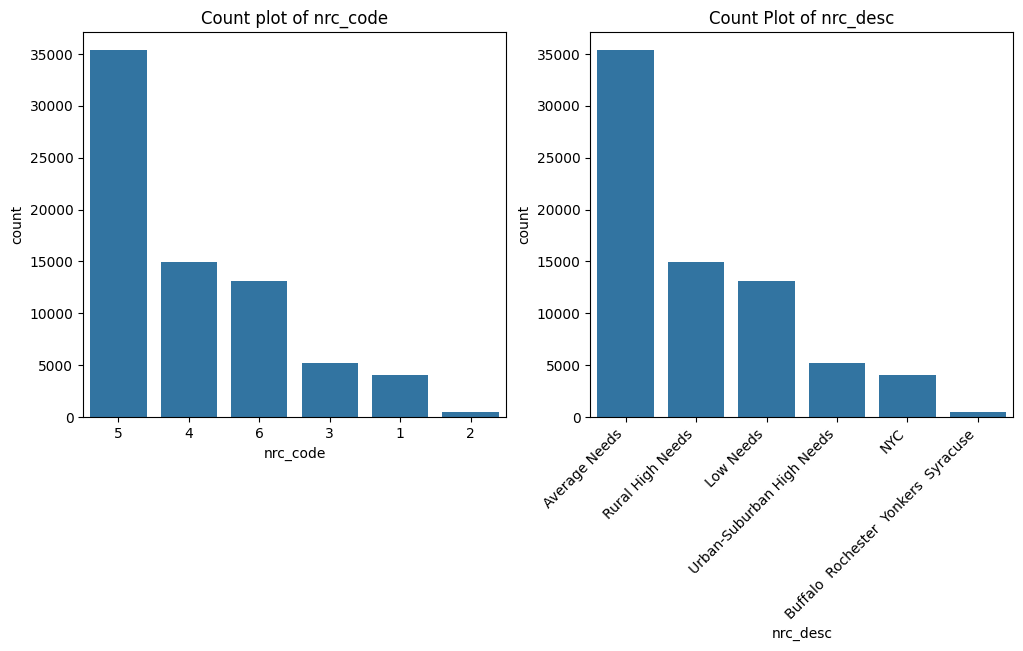

In [215]:
# Subplots of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for nrc_code
sns.countplot(x='nrc_code', data=df, ax=axes[0], order=df['nrc_code'].value_counts().index)
axes[0].set_title('Count plot of nrc_code')

# Count Plot sorted
sns.countplot(x='nrc_desc', data=df, ax=axes[1], order=df['nrc_desc'].value_counts().index)
axes[1].set_title('Count Plot of nrc_desc')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


- There are more number of schools with nrc_desc with "Average Needs" in the dataset

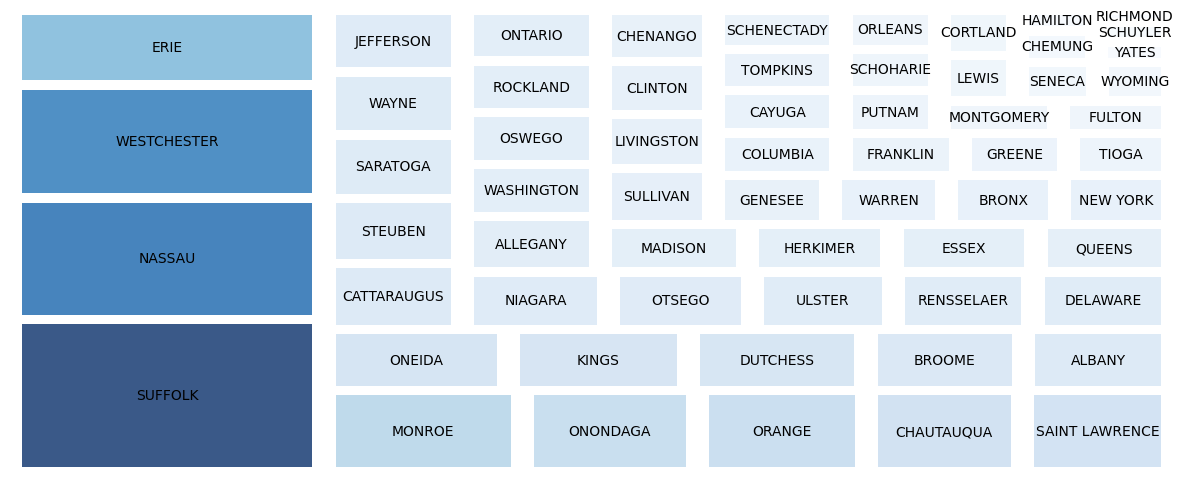

In [216]:
# County Names and counts
county_data = df['county_name'].value_counts().reset_index()
county_data.columns = ['county_name', 'count']

# Color normalisation
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin= county_data['count'].min(), vmax=county_data['count'].max())
colors = [cmap(norm(i)) for i in county_data['count']]

# Tree maps
plt.figure(figsize=(15, 6))
squarify.plot(sizes=county_data['count'], label=county_data['county_name'], color= colors, alpha=.8, pad= True)
plt.axis('off')
plt.show()

- More number of schools from "Suffolk" county are present in the dataset

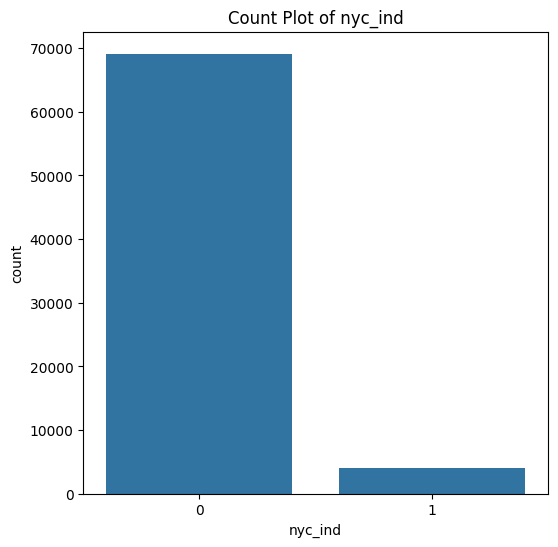

In [217]:
# Count plot for nyc_id and show counts

plt.figure(figsize=(6, 6))
sns.countplot(x='nyc_ind', data=df)
plt.title('Count Plot of nyc_ind')
plt.show()

- Maximum number of schools in dataset are out side of NYC

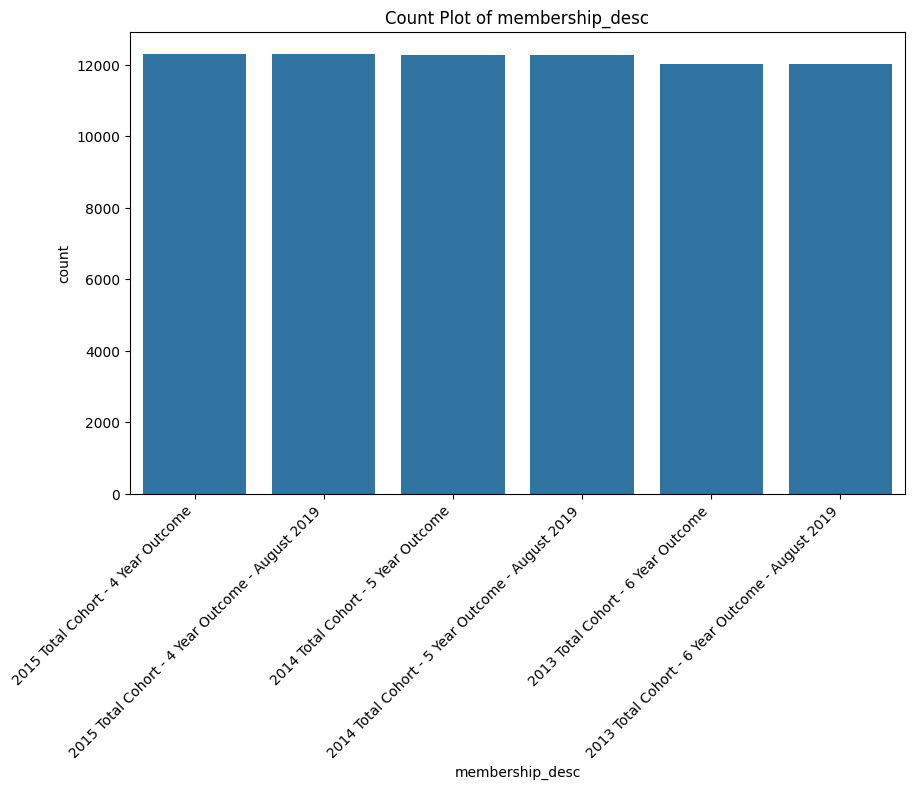

In [218]:
# Count plot for membership_desc

plt.figure(figsize=(10, 6))
sns.countplot(x='membership_desc', data=df, order=df['membership_desc'].value_counts().index)
plt.title('Count Plot of membership_desc')
plt.xticks(rotation=45, ha= 'right')
plt.show()

In [219]:
df['membership_desc'].value_counts()

,count
membership_desc,
2015 Total Cohort - 4 Year Outcome,12299
2015 Total Cohort - 4 Year Outcome - August 2019,12299
2014 Total Cohort - 5 Year Outcome,12257
2014 Total Cohort - 5 Year Outcome - August 2019,12257
2013 Total Cohort - 6 Year Outcome,12020
2013 Total Cohort - 6 Year Outcome - August 2019,12020


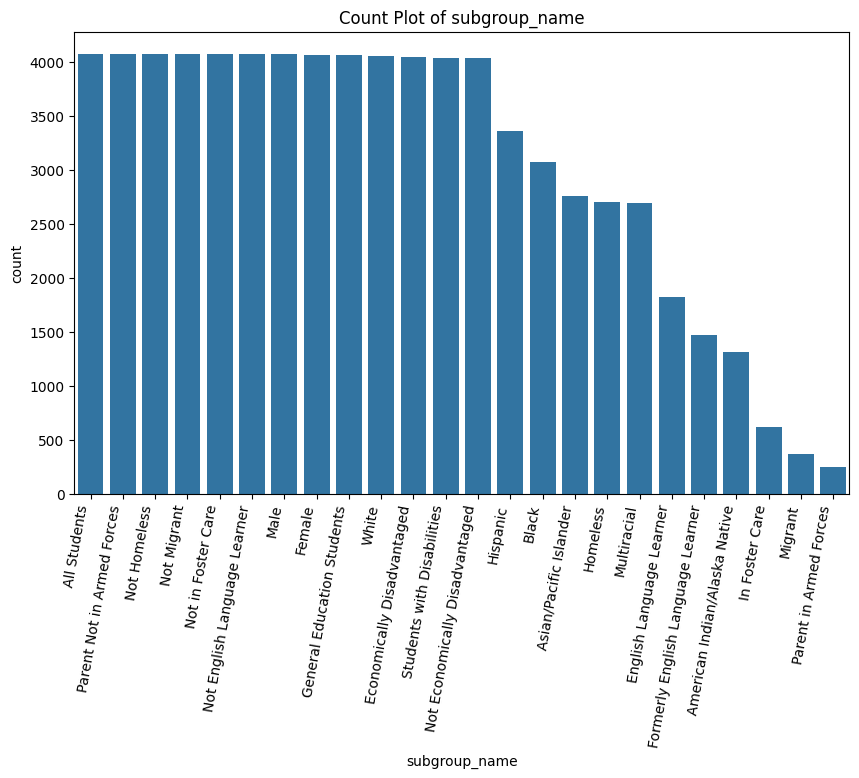

In [220]:
# Count plot for subgroup_name

plt.figure(figsize=(10, 6))
sns.countplot(x='subgroup_name', data=df, order=df['subgroup_name'].value_counts().index)
plt.title('Count Plot of subgroup_name')
plt.xticks(rotation=80, ha= 'right')
plt.show()

- Maximum students are from sub-groups of All Students to Not economically disadvantaged.

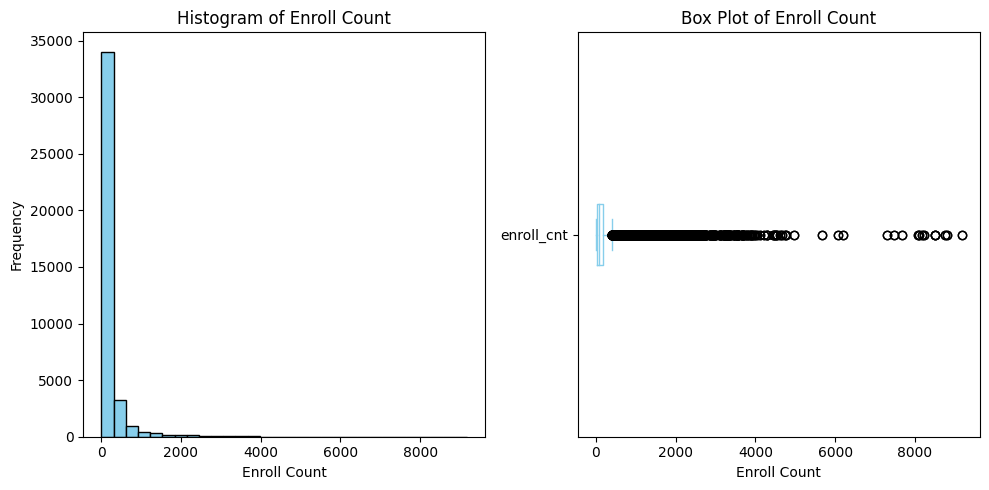

,enroll_cnt
count,39674.0
mean,192.120079
std,439.972474
min,5.0
25%,25.0
50%,66.0
75%,179.0
max,9176.0


In [221]:
# histogram and box plot for enroll_cnt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df['enroll_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Enroll Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df['enroll_cnt'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Enroll Count')
axes[1].set_title('Box Plot of Enroll Count')

plt.tight_layout()
plt.show()

df['enroll_cnt'].describe()

- The histogram is right skewed with median as 66 and with many outliers on max side.

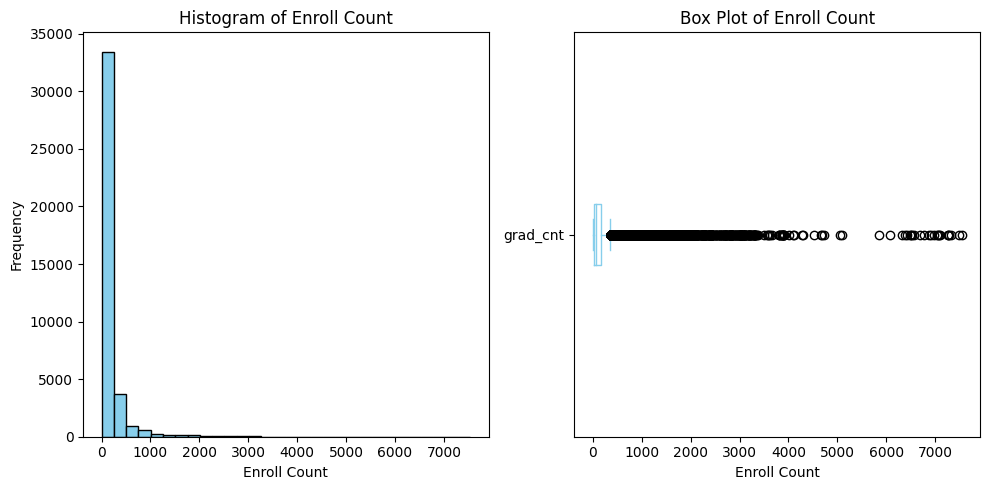

,grad_cnt
count,39674.0
mean,161.178354
std,361.294773
min,0.0
25%,20.0
50%,57.0
75%,156.0
max,7540.0


In [222]:
# histogram and box plot for grad_cnt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df['grad_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Enroll Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df['grad_cnt'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Enroll Count')
axes[1].set_title('Box Plot of Enroll Count')

plt.tight_layout()
plt.show()

df['grad_cnt'].describe()

- The Histogram is right skewed with median as 57 and there are potential outliers.

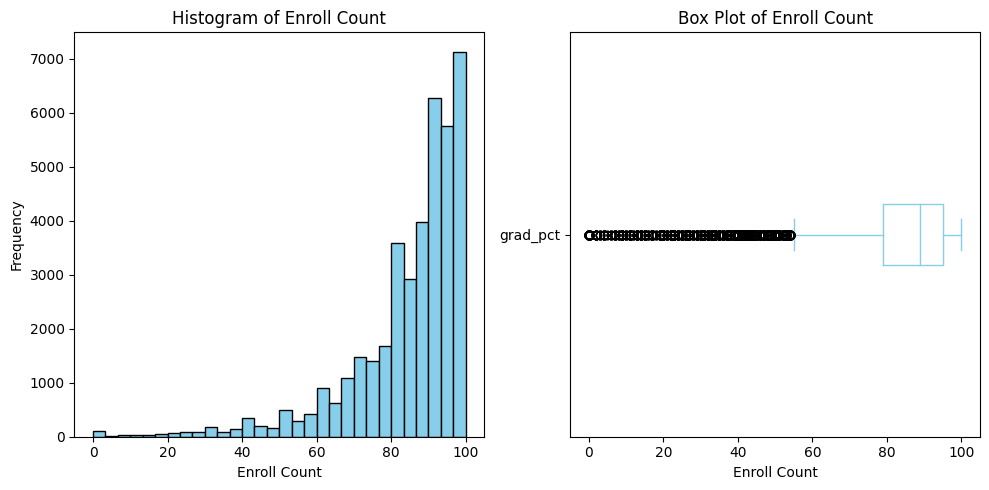

,grad_pct
count,39674.000000
mean,84.406614
std,15.679500
min,0.000000
25%,79.000000
50%,89.000000
75%,95.000000
max,100.000000


In [223]:
# histogram and box plot for grad_pct

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df['grad_pct'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Enroll Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df['grad_pct'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Enroll Count')
axes[1].set_title('Box Plot of Enroll Count')

plt.tight_layout()
plt.show()

df['grad_pct'].describe()

- The data is left skewed and has outliers on left side creating a tail.

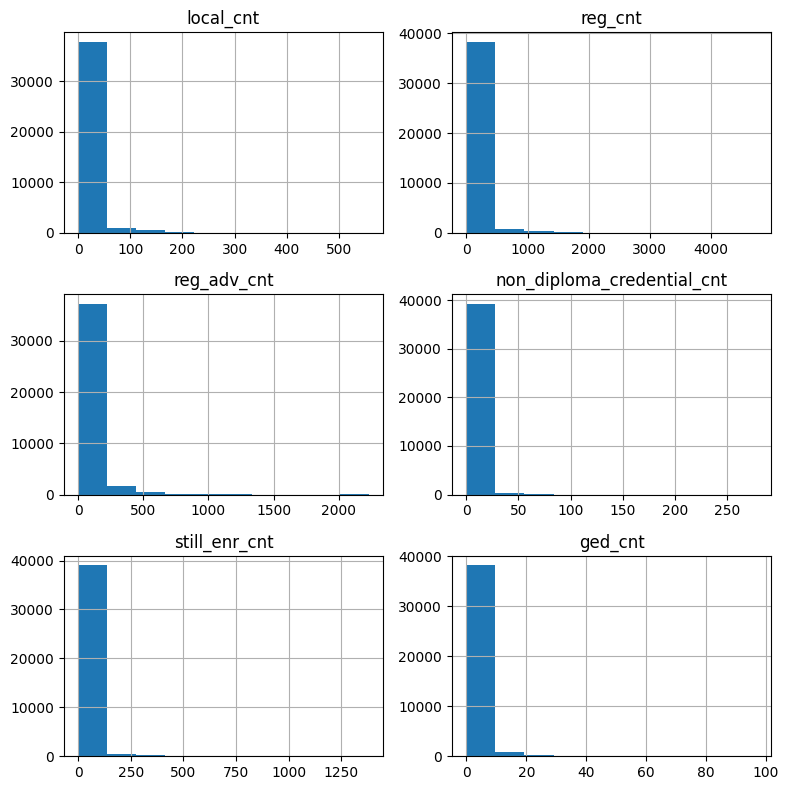

In [224]:
# Diplomas in count
diplomas_count = ['local_cnt',
        'reg_cnt',  'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt',  'ged_cnt']

# Diplomas in Percentage
diplomas_percentage = ['local_pct',
        'reg_pct',  'reg_adv_pct',
       'non_diploma_credential_pct',
       'still_enr_pct',  'ged_pct']

# histograms for diplomas_count
df[diplomas_count].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

- We can observe a mostly right skewed data from the histograms

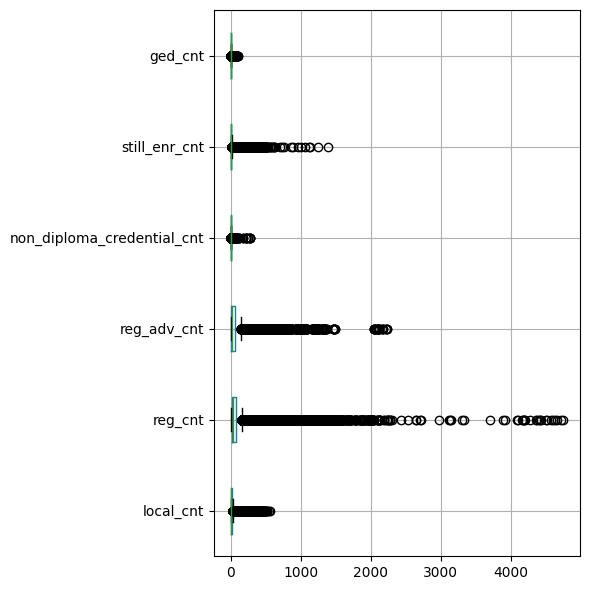

In [225]:
# Box plot for diplomas_count
df[diplomas_count].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()


- There are potential outliers towards right side.

In [226]:
df[diplomas_count].describe()

,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
count,39674.0,39674.0,39674.0,39674.0,39674.0,39674.0
mean,12.340903,86.804708,62.032742,1.924485,11.299516,1.377577
std,32.046302,225.795826,132.777866,6.498913,40.766672,4.949389
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,10.0,4.0,0.0,0.0,0.0
50%,4.0,27.0,18.0,0.0,2.0,0.0
75%,10.0,69.0,62.0,2.0,5.0,1.0
max,557.0,4752.0,2231.0,279.0,1381.0,97.0


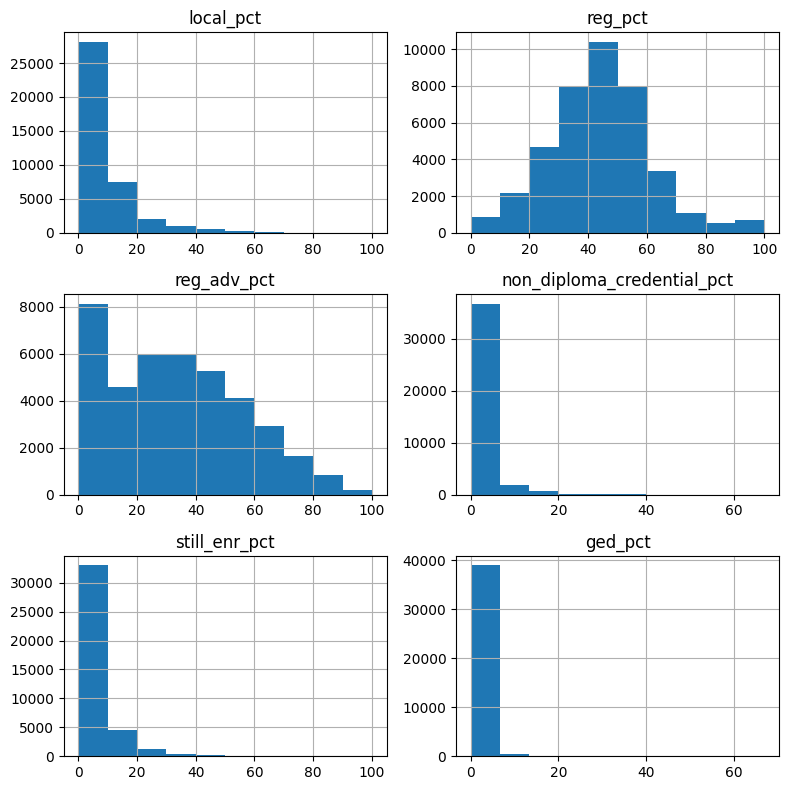

In [227]:
# histograms for diplomas_percentages
df[diplomas_percentage].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

- There are mostly right skewed data and reg-pct shows normal distribution

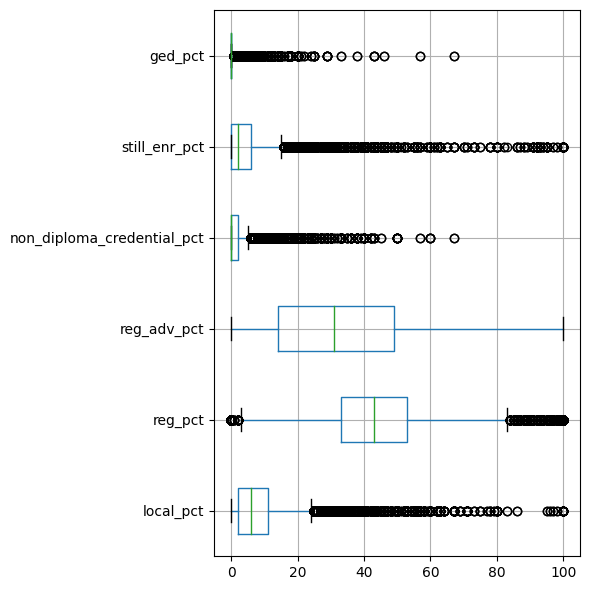

In [228]:
# Box plot for diplomas_percentages
df[diplomas_percentage].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()

- from this plots we can say that there are potential outliers in variables except reg_adv_pct

In [229]:
df[diplomas_percentage].describe()

,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
count,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,8.479936,43.371125,32.577204,1.742627,5.190704,0.612693
std,10.398486,17.124891,23.001197,4.063987,8.832710,1.985445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.000000,14.000000,0.000000,0.000000,0.000000
50%,6.000000,43.000000,31.000000,0.000000,2.000000,0.000000
75%,11.000000,53.000000,49.000000,2.000000,6.000000,0.000000
max,100.000000,100.000000,100.000000,67.000000,100.000000,67.000000


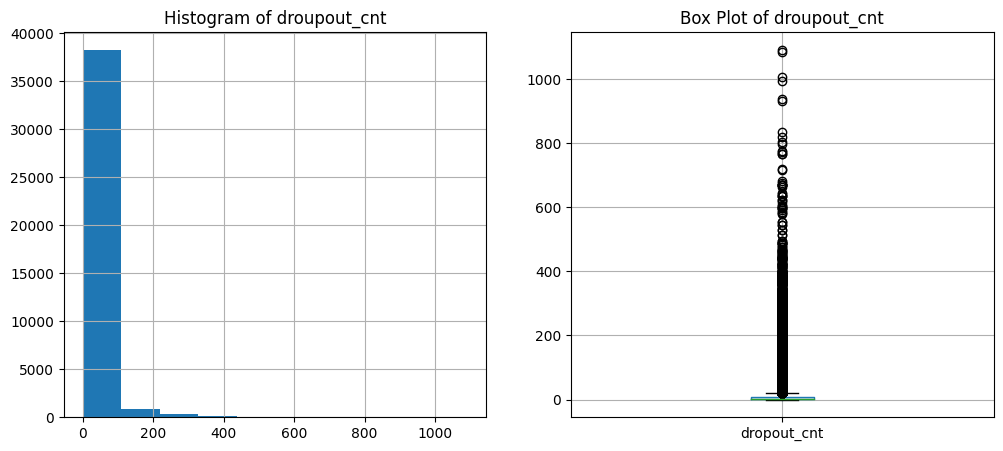

,dropout_cnt
count,39674.0
mean,16.239225
std,50.129834
min,0.0
25%,1.0
50%,3.0
75%,9.0
max,1091.0


In [230]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['dropout_cnt'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_cnt')

# Plot boxplot on the second subplot (axes[1])
df[['dropout_cnt']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_cnt')

plt.show()

df['dropout_cnt'].describe()

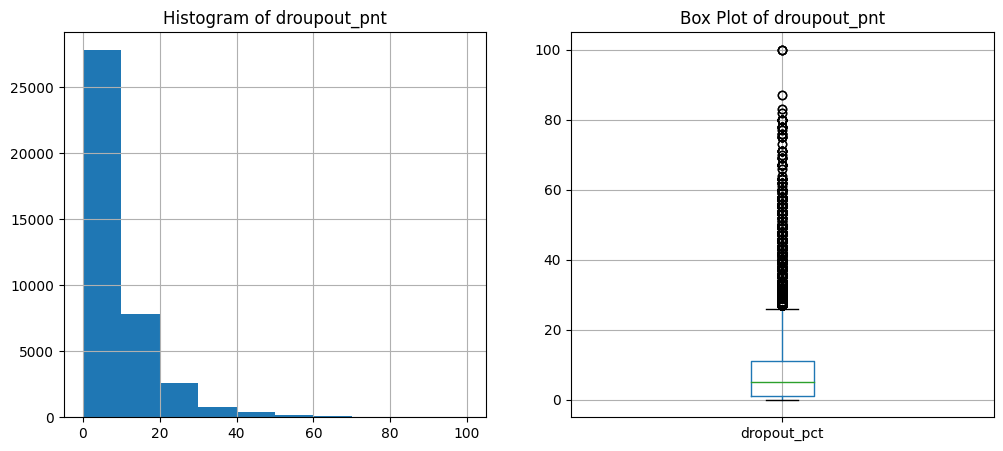

,dropout_pct
count,39674.000000
mean,7.963049
std,9.658698
min,0.000000
25%,1.000000
50%,5.000000
75%,11.000000
max,100.000000


In [231]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['dropout_pct'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_pnt')

# Plot boxplot on the second subplot (axes[1])
df[['dropout_pct']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_pnt')

plt.show()

df['dropout_pct'].describe()

# Bivariate Analysis


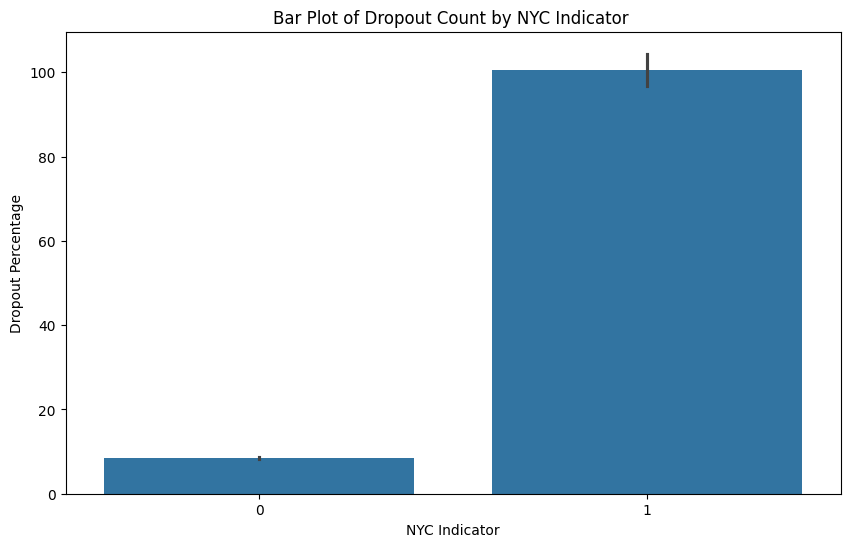

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='nyc_ind', y='dropout_cnt', data=df)
plt.xlabel('NYC Indicator')
plt.ylabel('Dropout Percentage')
plt.title('Bar Plot of Dropout Count by NYC Indicator ')
plt.show()

- From this plot we can say there are more drop_outs from schools which are in NYC from schools whch are not in NYC.

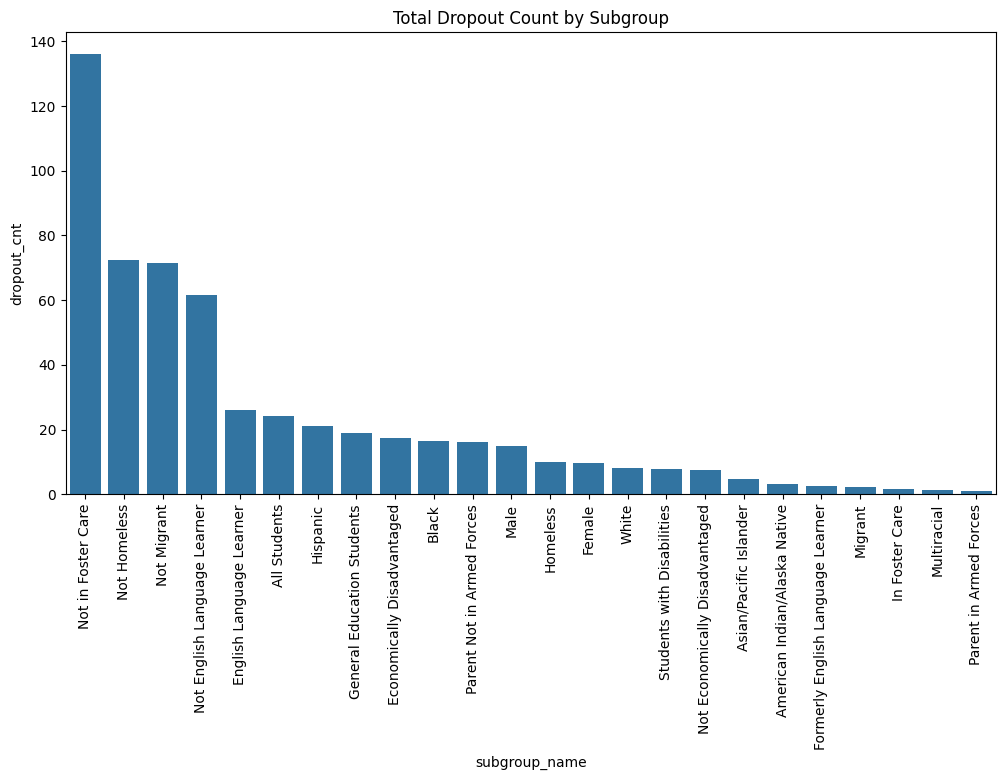

In [233]:
# Bar plot for droupout rates for subgroups
plt.figure(figsize=(12, 6))
sns.barplot(x='subgroup_name', y='dropout_cnt', data=df, ci=None, order=df.groupby('subgroup_name')['dropout_cnt'].mean().sort_values(ascending=False).index)
plt.title('Total Dropout Count by Subgroup')
plt.xticks(rotation=90)  # Rotate subgroup names for better visibility
plt.show()

- Sub-group of "Not in Foster Care" students shows more dropout count in the data.

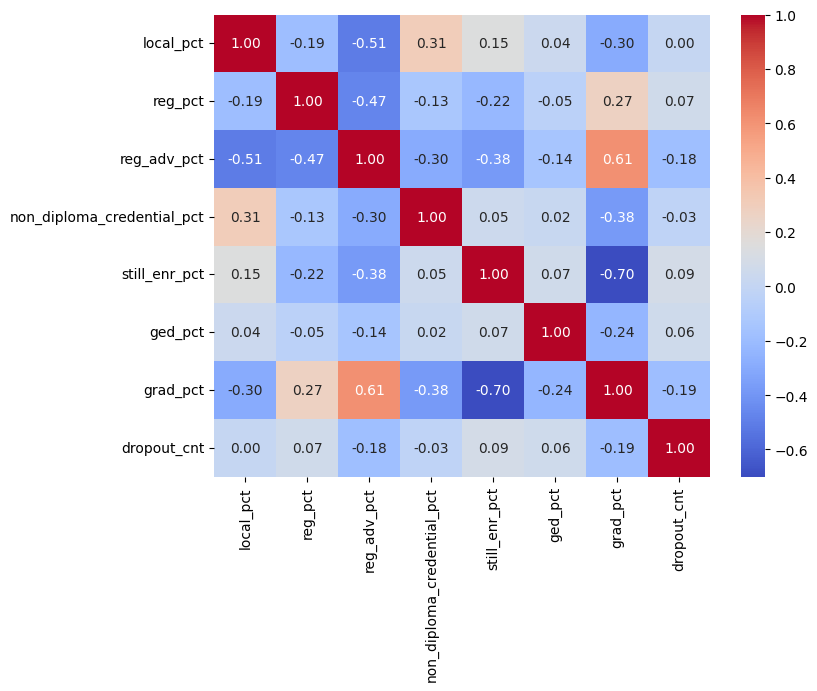

In [234]:
# Create new Dataframe with only diploma percentage data
dip= diplomas_percentage + ['grad_pct','dropout_cnt']
dip_data_pnt = df[dip]

# Compute correlation matrix
corr_matrix = dip_data_pnt.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- All the variables shows least colliniarity overall

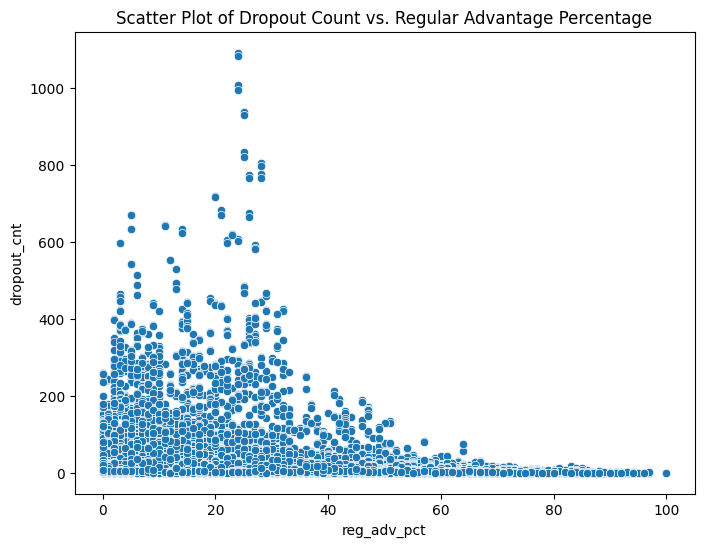

In [235]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reg_adv_pct', y='dropout_cnt', data=df)
plt.title('Scatter Plot of Dropout Count vs. Regular Advantage Percentage')
plt.show()

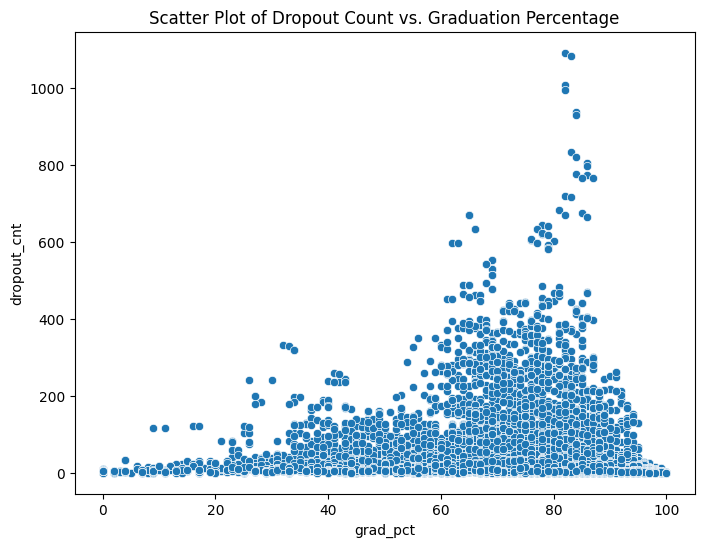

In [236]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grad_pct', y='dropout_cnt', data=df)
plt.title('Scatter Plot of Dropout Count vs. Graduation Percentage')
plt.show()

# Data Preparation

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  Int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  Int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  Int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  Int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  Int64  
 13  grad_cnt                    396

In [238]:
numerical_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']

In [239]:
# Check for nulls
df[numerical_cols].isnull().sum()

,0
enroll_cnt,33478
grad_cnt,33478
grad_pct,33478
local_cnt,33478
local_pct,33478
reg_cnt,33478
reg_pct,33478
reg_adv_cnt,33478
reg_adv_pct,33478
non_diploma_credential_cnt,33478


In [240]:
from sklearn.impute import KNNImputer
# Initialize and apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_cols]), columns=numerical_cols)

df_imputed.head()

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658.000000,464.000000,71.000000,63.000000,10.000000,310.000000,47.000000,91.000000,14.000000,16.000000,2.000000,30.000000,5.000000,0.000000,0.000000,148.000000,22.000000
1,324.000000,246.000000,76.000000,30.000000,9.000000,169.000000,52.000000,47.000000,15.000000,2.000000,1.000000,11.000000,3.000000,0.000000,0.000000,65.000000,20.000000
2,334.000000,218.000000,65.000000,33.000000,10.000000,141.000000,42.000000,44.000000,13.000000,14.000000,4.000000,19.000000,6.000000,0.000000,0.000000,83.000000,25.000000
3,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
4,367.000000,248.000000,68.000000,42.000000,11.000000,183.000000,50.000000,23.000000,6.000000,10.000000,3.000000,18.000000,5.000000,0.000000,0.000000,91.000000,25.000000


In [241]:
df[numerical_cols] = df_imputed

In [243]:
df.isnull().sum()

,0
report_school_year,0
aggregation_index,0
aggregation_type,0
aggregation_name,0
nrc_code,0
nrc_desc,0
county_code,0
county_name,0
nyc_ind,0
membership_desc,0


In [244]:
# List of count columns (these should be converted to int)
count_columns = [
    'aggregation_index', 'nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt',
    'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt',
    'still_enr_cnt', 'ged_cnt', 'dropout_cnt'
]

# List of percentage columns (these should be converted to floats)
percentage_columns = [
    'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
    'still_enr_pct', 'ged_pct', 'dropout_pct'
]


# Convert count columns to integers by rounding
df[count_columns] = df[count_columns].round().astype('int')



# Convert percentage columns to 2 point floats
df[percentage_columns] = df[percentage_columns].round(2)

Finding the best method for treating outliers

In [245]:
from scipy.stats.mstats import winsorize
#Winsorization

# Specify the limits for Winsorization

# capping the values below the 5th percentile and above the 95th percentile
limits = (0.05, 0.05)  # chose 5th and 95th percentile

# Apply Winsorization to each numerical column
df_winsorized = df[numerical_cols].apply(lambda x: winsorize(x, limits=limits))

# Check the summary statistics after Winsorization
df_winsorized.describe()



,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,156.584974,132.796602,85.204027,9.283314,7.740820,67.470322,43.131327,52.250451,32.050556,1.530279,1.407299,7.715346,4.582538,0.803273,0.467377,11.485346,7.404184
std,106.435993,90.941748,8.358798,6.458098,4.688367,44.808385,9.789483,41.332675,15.616620,1.265275,1.288651,6.249743,3.497643,0.948712,0.521859,8.889377,4.865442
min,10.000000,8.000000,63.000000,0.000000,0.000000,4.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,50.000000,84.410000,3.000000,5.000000,24.000000,42.000000,15.000000,29.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,192.000000,161.000000,84.410000,12.000000,8.480000,87.000000,43.370000,62.000000,32.580000,2.000000,1.740000,11.000000,5.190000,1.000000,0.610000,16.000000,7.960000
75%,192.000000,161.000000,90.000000,12.000000,8.480000,87.000000,45.000000,62.000000,34.000000,2.000000,1.740000,11.000000,5.190000,1.000000,0.610000,16.000000,7.960000
max,443.000000,378.000000,99.000000,26.000000,20.000000,182.000000,64.000000,169.000000,65.000000,5.000000,5.000000,24.000000,14.000000,4.000000,2.000000,35.000000,20.000000


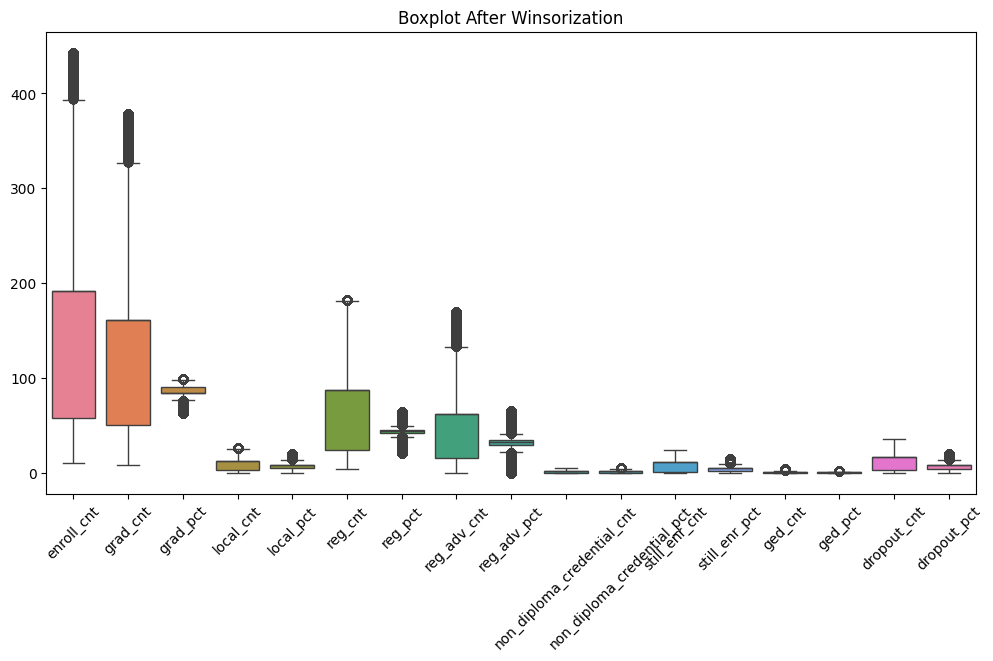

In [246]:
# Boxplot after Winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_winsorized)
plt.title('Boxplot After Winsorization')
plt.xticks(rotation=45)
plt.show()


In [247]:
import numpy as np

In [248]:
# CAPPING

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping: replace values lower than the lower bound with the lower bound, and values higher than the upper bound with the upper bound
df_capped = df[numerical_cols].apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name],
                                                        np.where(x > upper_bound[x.name], upper_bound[x.name], x)))


# Check if outliers were capped
df_capped.describe()


,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,153.775290,129.881651,86.166878,9.257539,7.297957,67.345958,43.408852,50.082609,31.973777,1.530279,1.368335,7.812705,4.308648,0.720083,0.435963,11.509952,6.961490
std,99.863311,84.232813,6.204522,6.391987,3.736717,44.887667,3.915354,35.795778,6.596515,1.265275,1.185099,6.512589,2.860761,0.701727,0.435864,8.954884,3.911993
min,5.000000,0.000000,76.025000,0.000000,0.000000,0.000000,37.500000,0.000000,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,50.000000,84.410000,3.000000,5.000000,24.000000,42.000000,15.000000,29.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,192.000000,161.000000,84.410000,12.000000,8.480000,87.000000,43.370000,62.000000,32.580000,2.000000,1.740000,11.000000,5.190000,1.000000,0.610000,16.000000,7.960000
75%,192.000000,161.000000,90.000000,12.000000,8.480000,87.000000,45.000000,62.000000,34.000000,2.000000,1.740000,11.000000,5.190000,1.000000,0.610000,16.000000,7.960000
max,393.000000,327.500000,98.385000,25.500000,13.700000,181.500000,49.500000,132.500000,41.500000,5.000000,4.350000,26.000000,9.975000,2.500000,1.525000,35.500000,13.900000


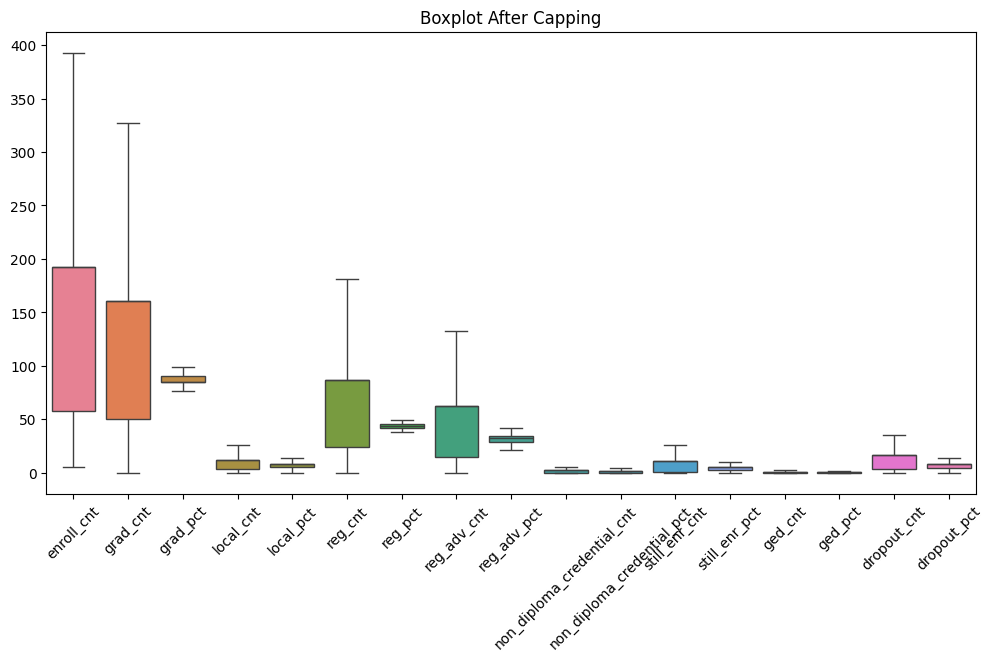

In [249]:

# Boxplot after Capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_capped[numerical_cols])
plt.title('Boxplot After Capping')
plt.xticks(rotation=45)
plt.show()

In [250]:
# LOG TRANSFORMATION

# Apply logarithmic transformation to numerical columns
df_log_transformed = df[numerical_cols].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Check the transformed data
df_log_transformed.describe()

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,4.717803,4.536916,4.430303,2.071173,1.979127,3.882950,3.733993,3.459162,3.246826,0.821106,0.765554,1.813511,1.490094,0.516657,0.355341,2.164693,1.902477
std,1.121751,1.157408,0.241254,0.999838,0.810547,1.164578,0.419810,1.403222,0.989651,0.635839,0.630886,1.132767,0.847400,0.571215,0.408741,1.161733,0.851647
min,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077537,3.931826,4.447463,1.386294,1.791759,3.218876,3.761200,2.772589,3.401197,0.000000,0.000000,0.693147,1.098612,0.000000,0.000000,1.386294,1.609438
50%,5.262690,5.087596,4.447463,2.564949,2.249184,4.477337,3.792564,4.143135,3.513931,1.098612,1.007958,2.484907,1.822935,0.693147,0.476234,2.833213,2.192770
75%,5.262690,5.087596,4.510860,2.564949,2.249184,4.477337,3.828641,4.143135,3.555348,1.098612,1.007958,2.484907,1.822935,0.693147,0.476234,2.833213,2.192770
max,9.124456,8.928110,4.615121,6.324359,4.615121,8.466531,4.615121,7.710653,4.615121,5.634790,4.219508,7.231287,4.615121,4.584967,4.219508,6.995766,4.615121


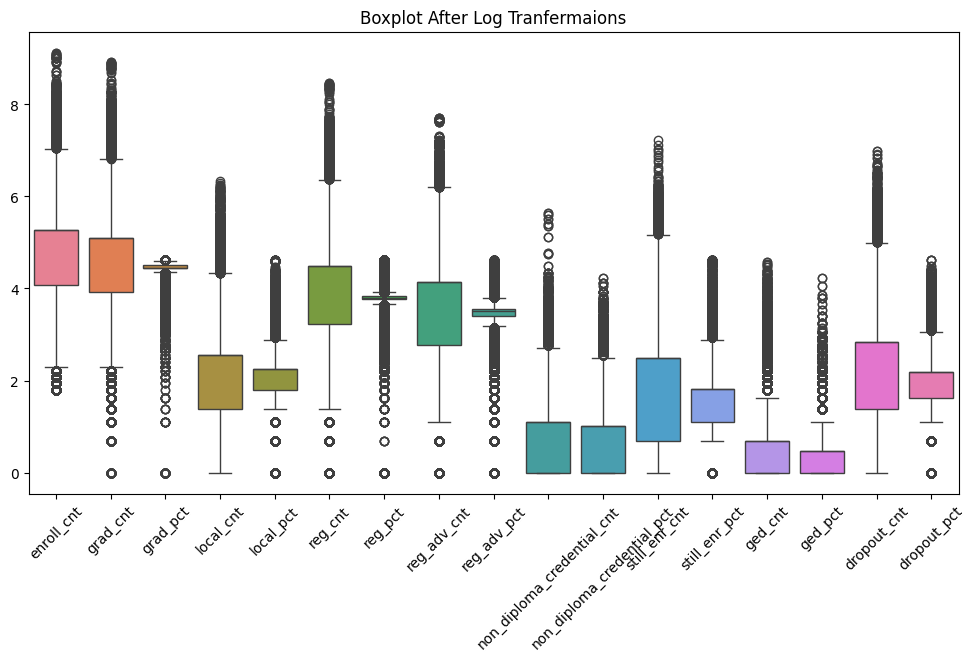

In [251]:

# Boxplot after Capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log_transformed)
plt.title('Boxplot After Log Tranfermaions')
plt.xticks(rotation=45)
plt.show()

- After all these observations over different methods, capping is treating the outliers better than others.

In [252]:
df[numerical_cols] = df_capped

In [253]:
# Make a copy of neat data
df_cleaned = df.copy()

In [254]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  73152 non-null  float64
 13  grad_cnt                    731

All missing values and outliers are treated, proceeding with one-hot encoding for categorical variables.

In [255]:
#removing all the columns that have associated code values in dataset and catogorical varaible 'aggregation_name' which is too large for encoding
to_remove = ['report_school_year','aggregation_index','aggregation_type','nrc_desc', 'county_name', 'subgroup_name','aggregation_name']
df_cleaned = df_cleaned.drop(columns = to_remove)

- Droping varibales like indices, single valued catogories(which has only one value to entier dataset)

In [256]:
df_cleaned.columns

Index(['nrc_code', 'county_code', 'nyc_ind', 'membership_desc',
       'subgroup_code', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

In [257]:
df_cleaned['membership_desc']

,membership_desc
0,2013 Total Cohort - 6 Year Outcome
1,2013 Total Cohort - 6 Year Outcome
2,2013 Total Cohort - 6 Year Outcome
3,2013 Total Cohort - 6 Year Outcome
4,2013 Total Cohort - 6 Year Outcome
...,...
73147,2013 Total Cohort - 6 Year Outcome - August 2019
73148,2013 Total Cohort - 6 Year Outcome - August 2019
73149,2013 Total Cohort - 6 Year Outcome - August 2019
73150,2013 Total Cohort - 6 Year Outcome - August 2019


In [258]:
categorical_cols = ['membership_desc']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, dtype= int)

# Display the first few rows of the encoded DataFrame
df_encoded.head(20)


,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,...,ged_cnt,ged_pct,dropout_cnt,dropout_pct,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019
0,3,1,0,1,393.0,327.5,76.025,25.5,10.00,181.5,...,0.0,0.00,35.5,13.90,1,0,0,0,0,0
1,3,1,0,2,324.0,246.0,76.025,25.5,9.00,169.0,...,0.0,0.00,35.5,13.90,1,0,0,0,0,0
2,3,1,0,3,334.0,218.0,76.025,25.5,10.00,141.0,...,0.0,0.00,35.5,13.90,1,0,0,0,0,0
3,3,1,0,4,192.0,161.0,84.410,12.0,8.48,87.0,...,1.0,0.61,16.0,7.96,1,0,0,0,0,0
4,3,1,0,5,367.0,248.0,76.025,25.5,11.00,181.5,...,0.0,0.00,35.5,13.90,1,0,0,0,0,0
5,3,1,0,6,98.0,58.0,76.025,13.0,13.00,40.0,...,0.0,0.00,28.0,13.90,1,0,0,0,0,0
6,3,1,0,7,46.0,38.0,83.000,0.0,0.00,26.0,...,0.0,0.00,8.0,13.90,1,0,0,0,0,0
7,3,1,0,8,130.0,105.0,81.000,6.0,5.00,50.0,...,0.0,0.00,19.0,13.90,1,0,0,0,0,0
8,3,1,0,9,192.0,161.0,84.410,12.0,8.48,87.0,...,1.0,0.61,16.0,7.96,1,0,0,0,0,0
9,3,1,0,10,393.0,327.5,76.025,25.5,5.00,181.5,...,0.0,0.00,35.5,13.90,1,0,0,0,0,0


In [259]:
df_cleaned = df_encoded

## Post EDA

In [260]:
df_cleaned.columns

Index(['nrc_code', 'county_code', 'nyc_ind', 'subgroup_code', 'enroll_cnt',
       'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')

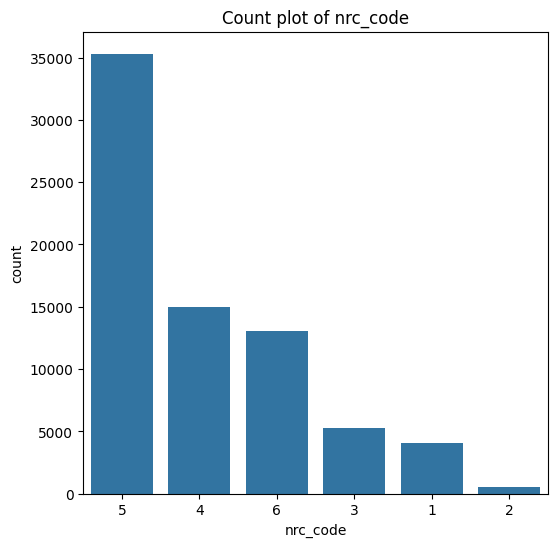

In [261]:
# countplot for nrc_codes
plt.figure(figsize=(6, 6))
sns.countplot(x='nrc_code', data=df_cleaned, order=df_cleaned['nrc_code'].value_counts().index)
plt.title('Count plot of nrc_code')
plt.show()


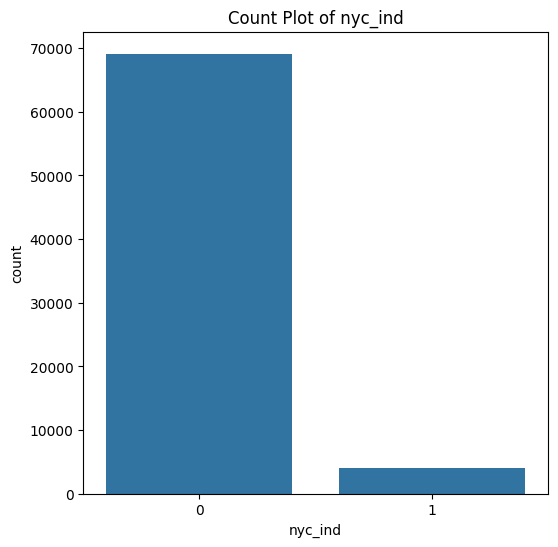

In [262]:
# Count plot for nyc_id

plt.figure(figsize=(6, 6))
sns.countplot(x='nyc_ind', data=df_cleaned)
plt.title('Count Plot of nyc_ind')
plt.show()

In [263]:
# Filter the columns that start with "membership_desc"
membership_cols = [col for col in df_cleaned.columns if col.startswith('membership_desc')]
# Create a new DataFrame to hold the counts of 1s
counts = df_cleaned[membership_cols].apply(lambda x: (x == 1).sum())
counts

,0
membership_desc_2013 Total Cohort - 6 Year Outcome,12020
membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,12020
membership_desc_2014 Total Cohort - 5 Year Outcome,12257
membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,12257
membership_desc_2015 Total Cohort - 4 Year Outcome,12299
membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019,12299


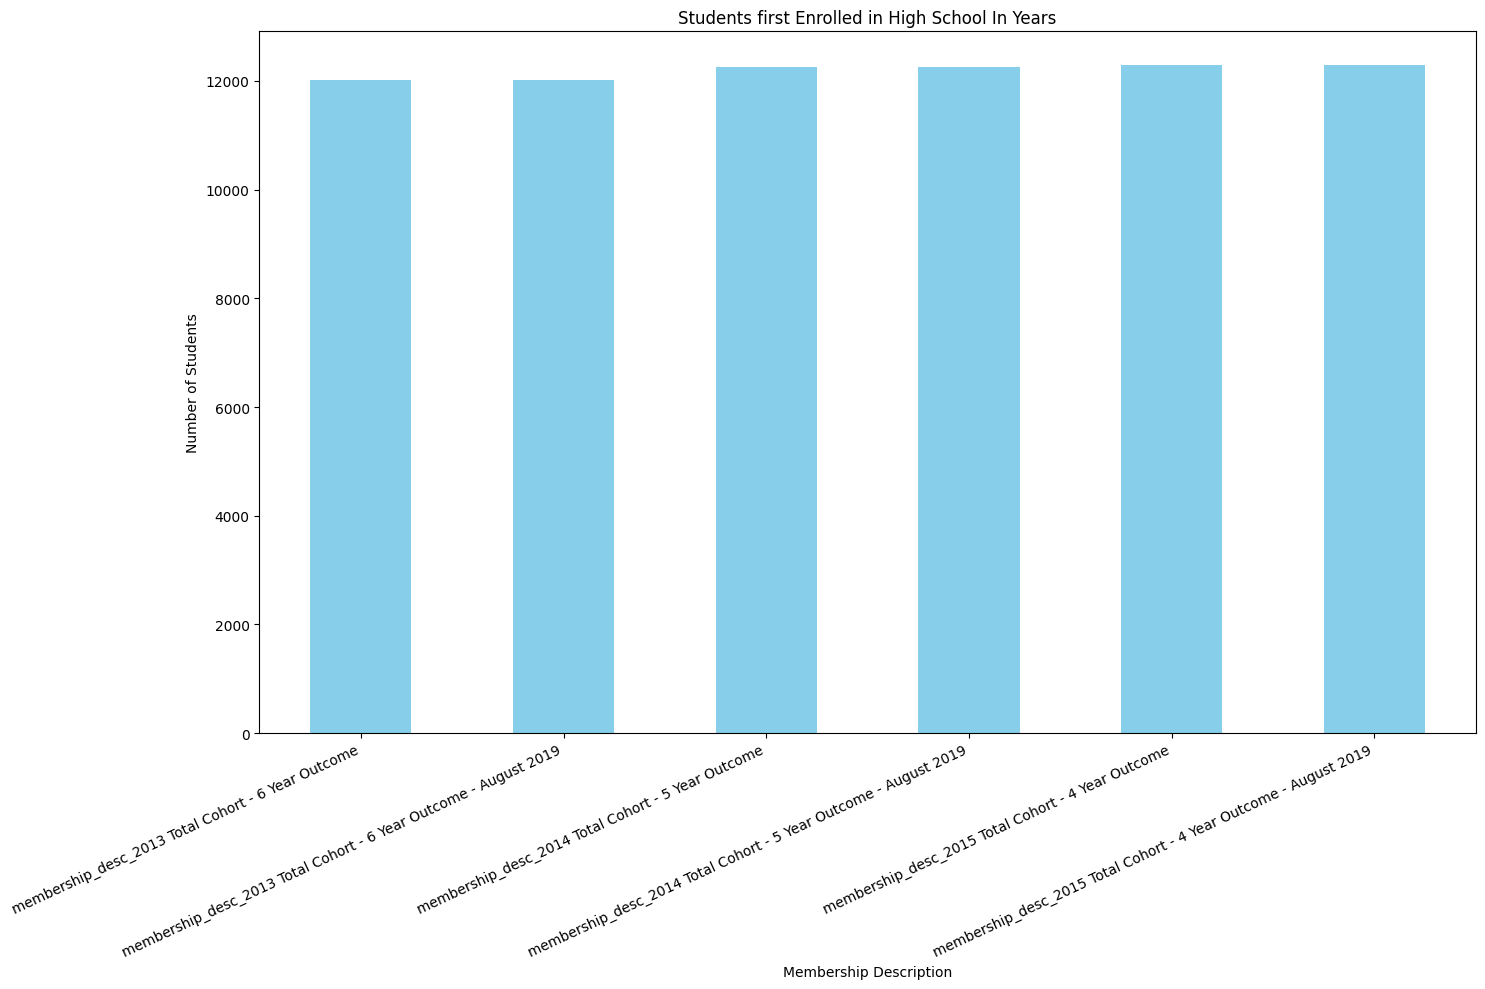

In [264]:
# Create a bar plot
plt.figure(figsize=(15, 10))
counts.plot(kind='bar', color='skyblue')
plt.title('Students first Enrolled in High School In Years')
plt.xlabel('Membership Description')
plt.ylabel('Number of Students')
plt.xticks(rotation=25, ha = 'right')
plt.tight_layout()
plt.show()

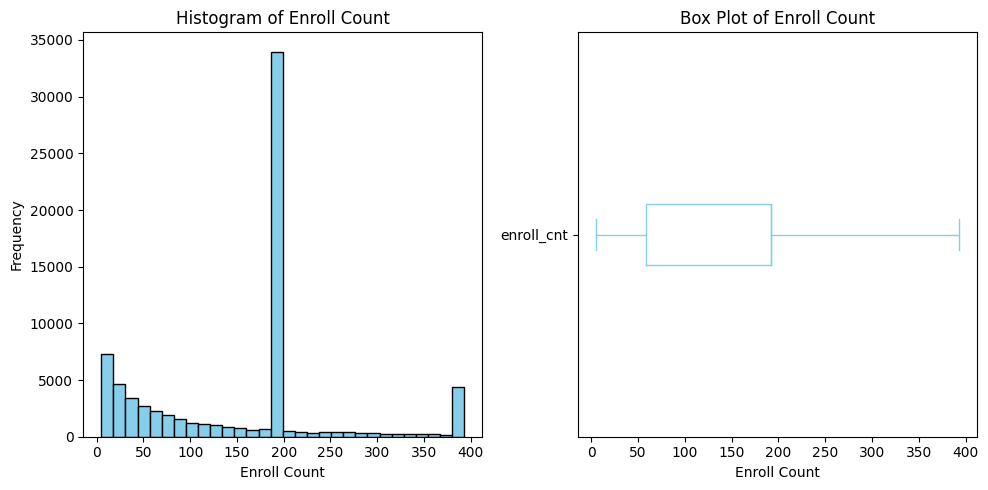

,enroll_cnt
count,73152.000000
mean,153.775290
std,99.863311
min,5.000000
25%,58.000000
50%,192.000000
75%,192.000000
max,393.000000


In [265]:
# histogram and box plot for enroll_cnt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_cleaned['enroll_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Enroll Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df_cleaned['enroll_cnt'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Enroll Count')
axes[1].set_title('Box Plot of Enroll Count')

plt.tight_layout()
plt.show()

df_cleaned['enroll_cnt'].describe()

- After data preparation we can see there no outliners in the distribution.

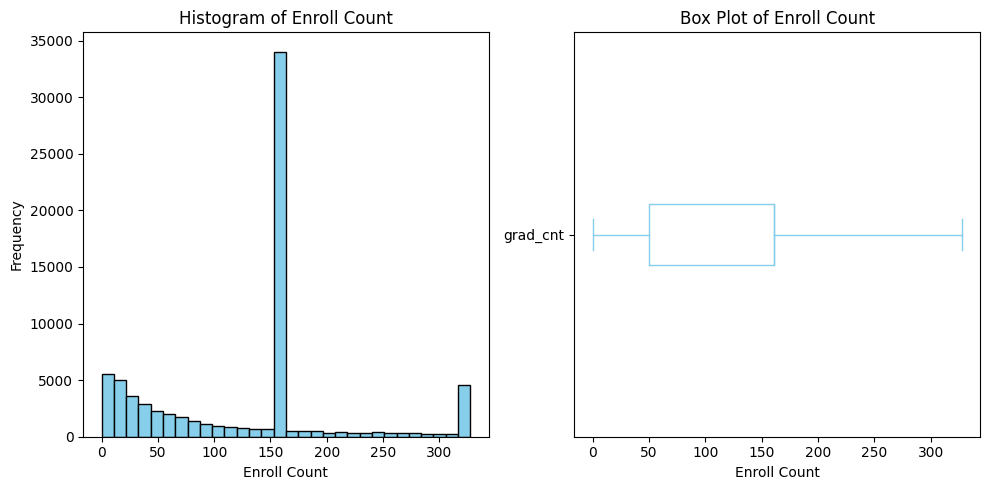

,grad_cnt
count,73152.000000
mean,129.881651
std,84.232813
min,0.000000
25%,50.000000
50%,161.000000
75%,161.000000
max,327.500000


In [266]:
# histogram and box plot for grad_cnt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_cleaned['grad_cnt'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Grad Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df_cleaned['grad_cnt'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Grad Count')
axes[1].set_title('Box Plot of Grad Count')

plt.tight_layout()
plt.show()

df_cleaned['grad_cnt'].describe()

- After data preparation we can see there no outliners in the distribution.

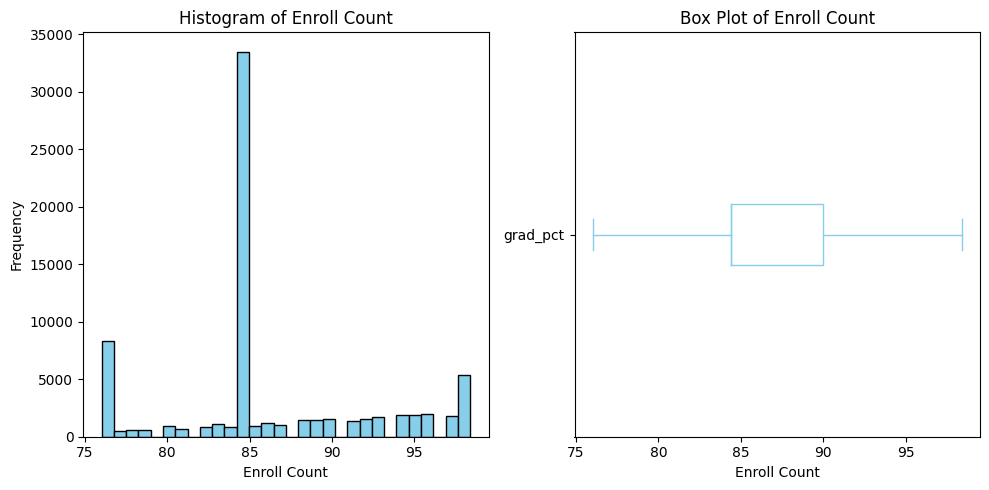

,grad_pct
count,73152.000000
mean,86.166878
std,6.204522
min,76.025000
25%,84.410000
50%,84.410000
75%,90.000000
max,98.385000


In [267]:
# histogram and box plot for grad_pct

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_cleaned['grad_pct'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Enroll Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Enroll Count')

df_cleaned['grad_pct'].plot(kind='box', vert=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Enroll Count')
axes[1].set_title('Box Plot of Enroll Count')

plt.tight_layout()
plt.show()

df_cleaned['grad_pct'].describe()

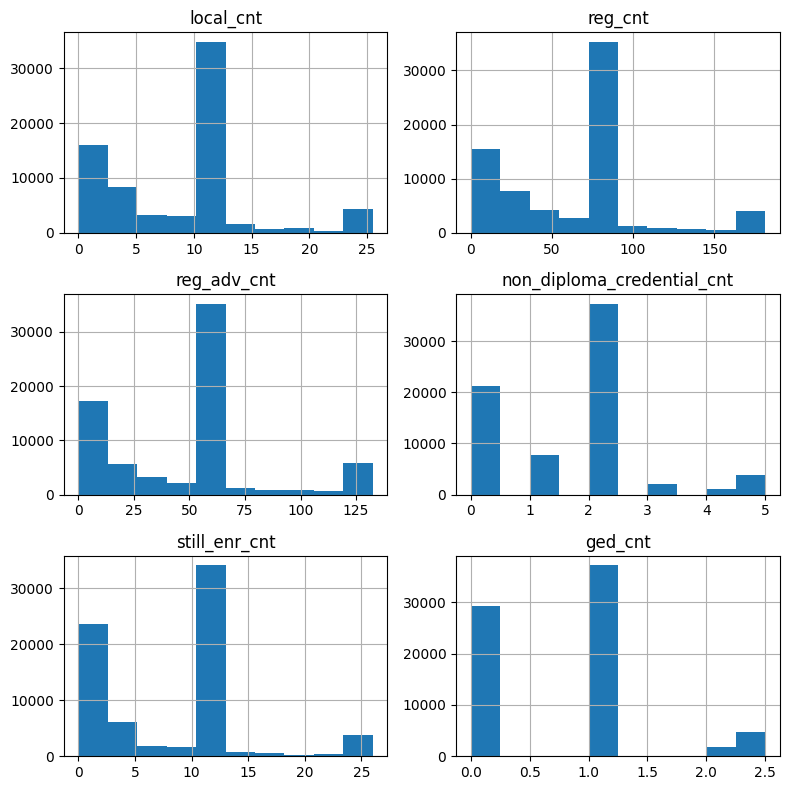

In [268]:
# Diplomas in count
diplomas_count = ['local_cnt',
        'reg_cnt',  'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt',  'ged_cnt']

# Diplomas in Percentage
diplomas_percentage = ['local_pct',
        'reg_pct',  'reg_adv_pct',
       'non_diploma_credential_pct',
       'still_enr_pct',  'ged_pct']

# histograms for diplomas_count
df_cleaned[diplomas_count].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

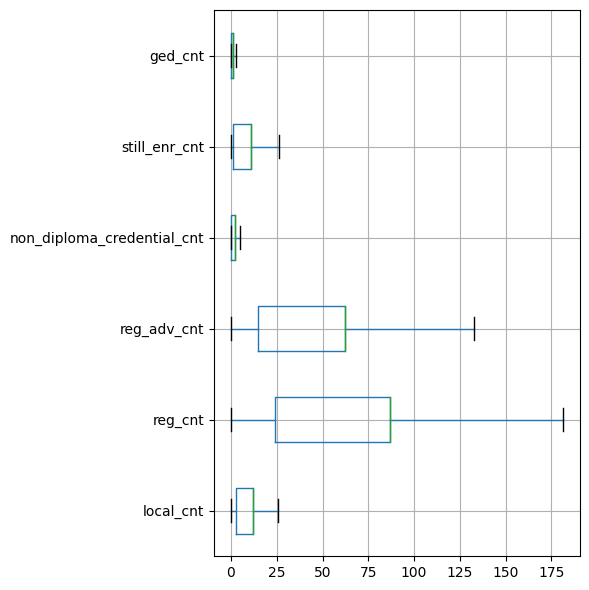

In [269]:
# Box plot for diplomas_count
df_cleaned[diplomas_count].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()


- After data preparation we can see there no outliners in the distribution.

In [270]:
df_cleaned[diplomas_count].describe()

,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
count,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,9.257539,67.345958,50.082609,1.530279,7.812705,0.720083
std,6.391987,44.887667,35.795778,1.265275,6.512589,0.701727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,24.000000,15.000000,0.000000,1.000000,0.000000
50%,12.000000,87.000000,62.000000,2.000000,11.000000,1.000000
75%,12.000000,87.000000,62.000000,2.000000,11.000000,1.000000
max,25.500000,181.500000,132.500000,5.000000,26.000000,2.500000


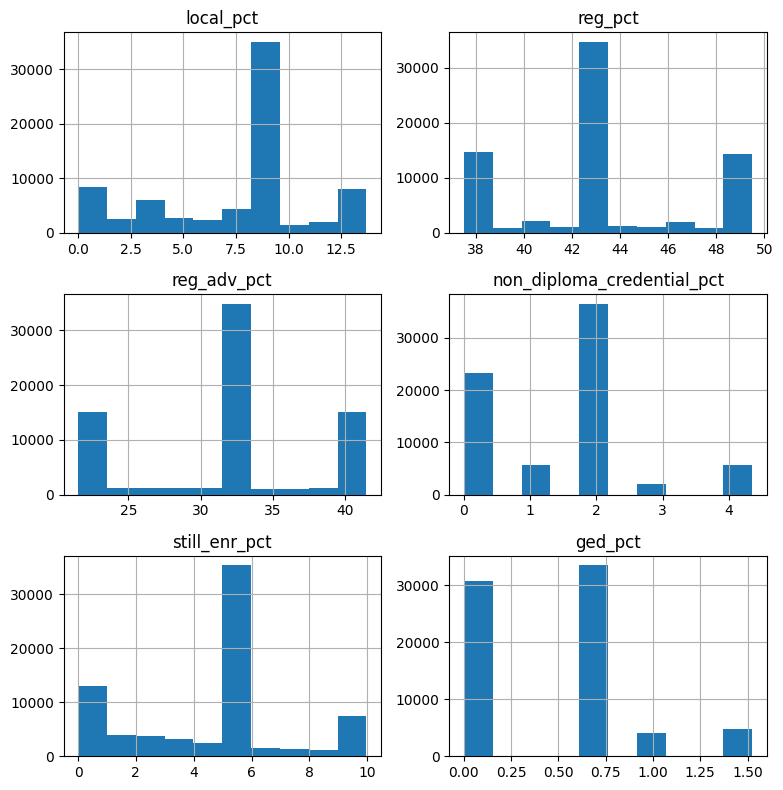

In [271]:
# histograms for diplomas_percentages
df_cleaned[diplomas_percentage].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

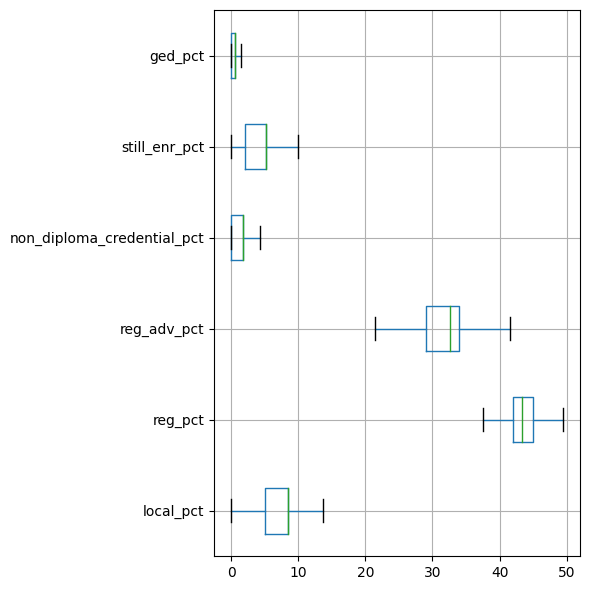

In [272]:
# Box plot for diplomas_percentages
df_cleaned[diplomas_percentage].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()

- After data preparation we can see there no outliners in the distribution.

In [273]:
df_cleaned[diplomas_percentage].describe()

,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
count,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000
mean,7.297957,43.408852,31.973777,1.368335,4.308648,0.435963
std,3.736717,3.915354,6.596515,1.185099,2.860761,0.435864
min,0.000000,37.500000,21.500000,0.000000,0.000000,0.000000
25%,5.000000,42.000000,29.000000,0.000000,2.000000,0.000000
50%,8.480000,43.370000,32.580000,1.740000,5.190000,0.610000
75%,8.480000,45.000000,34.000000,1.740000,5.190000,0.610000
max,13.700000,49.500000,41.500000,4.350000,9.975000,1.525000


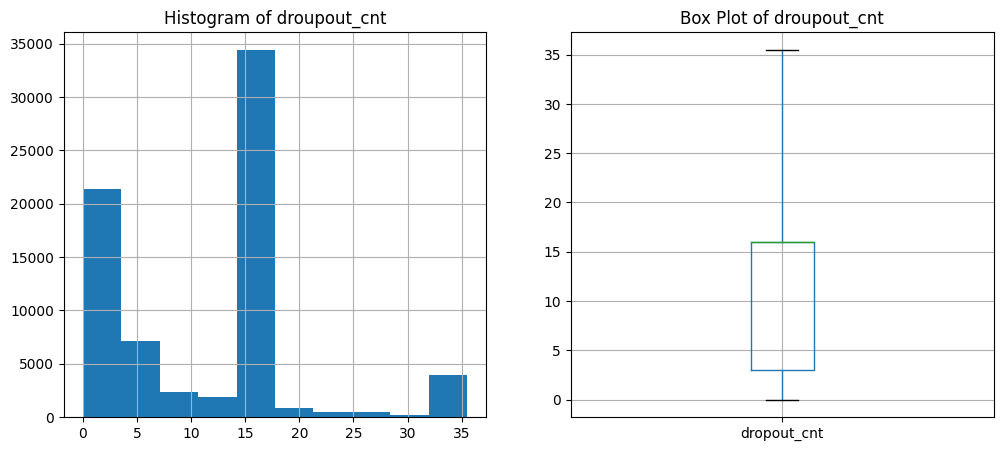

,dropout_cnt
count,73152.000000
mean,11.509952
std,8.954884
min,0.000000
25%,3.000000
50%,16.000000
75%,16.000000
max,35.500000


In [274]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df_cleaned['dropout_cnt'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_cnt')

# Plot boxplot on the second subplot (axes[1])
df_cleaned[['dropout_cnt']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_cnt')

plt.show()

df_cleaned['dropout_cnt'].describe()

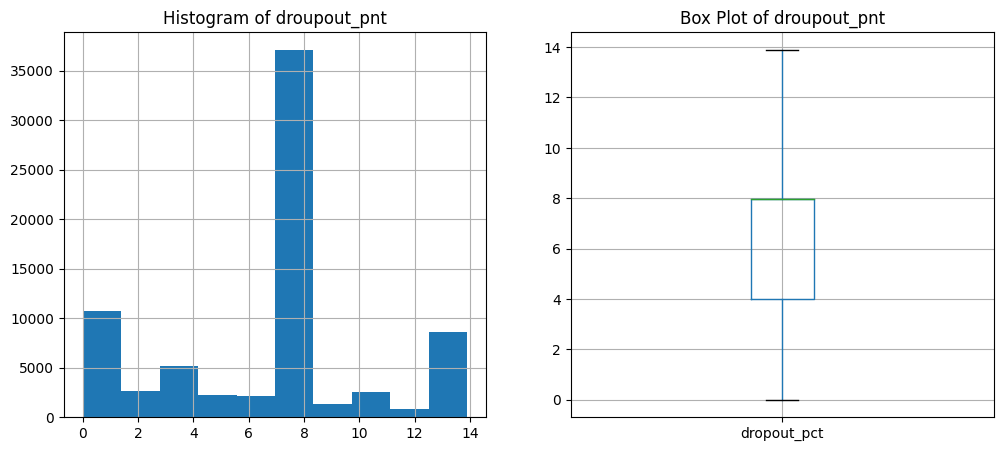

,dropout_pct
count,73152.000000
mean,6.961490
std,3.911993
min,0.000000
25%,4.000000
50%,7.960000
75%,7.960000
max,13.900000


In [275]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df_cleaned['dropout_pct'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_pnt')

# Plot boxplot on the second subplot (axes[1])
df_cleaned[['dropout_pct']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_pnt')

plt.show()

df_cleaned['dropout_pct'].describe()

## Bivariate


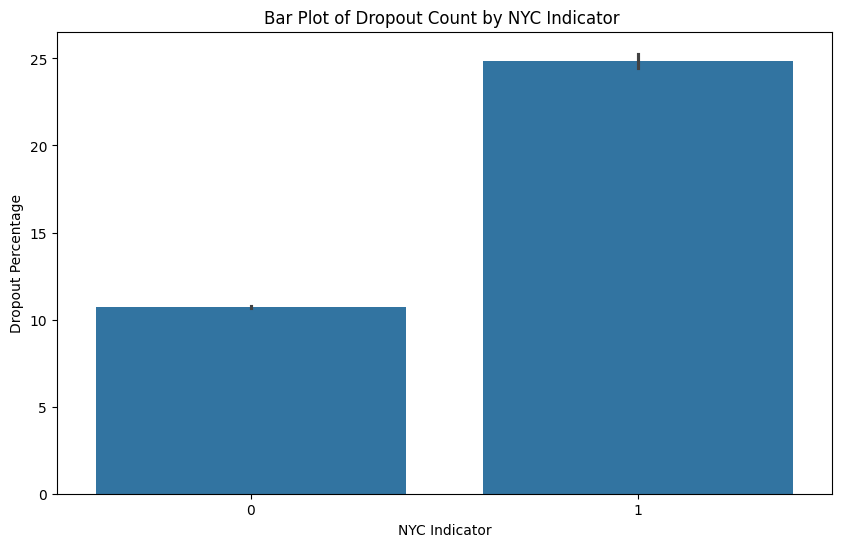

In [276]:
plt.figure(figsize=(10, 6))
sns.barplot(x='nyc_ind', y='dropout_cnt', data=df_cleaned)
plt.xlabel('NYC Indicator')
plt.ylabel('Dropout Percentage')
plt.title('Bar Plot of Dropout Count by NYC Indicator ')
plt.show()

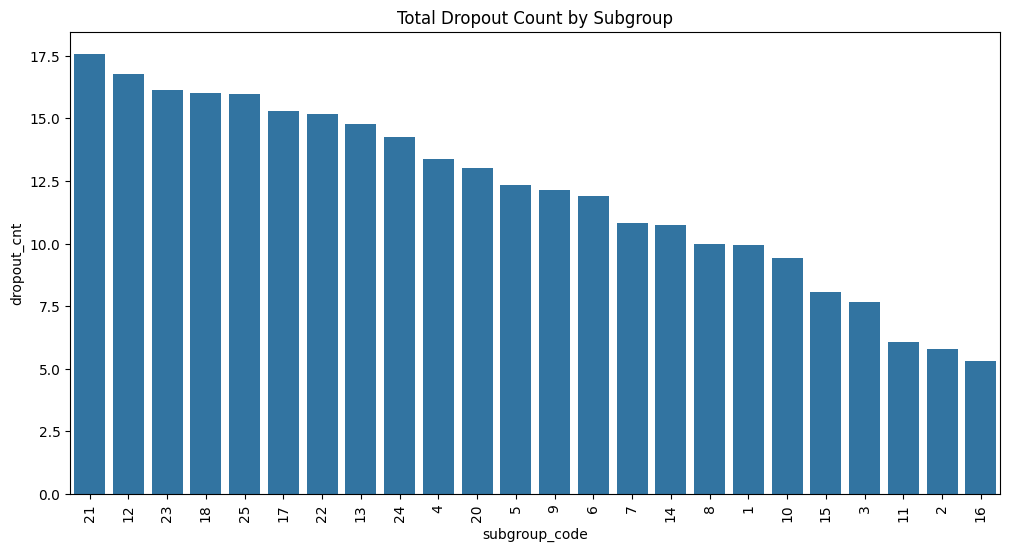

In [277]:
# Bar plot for droupout rates for subgroups
plt.figure(figsize=(12, 6))
sns.barplot(x='subgroup_code', y='dropout_cnt', data=df_cleaned, ci=None, order=df_cleaned.groupby('subgroup_code')['dropout_cnt'].mean().sort_values(ascending=False).index)
plt.title('Total Dropout Count by Subgroup')
plt.xticks(rotation=90)  # Rotate subgroup names for better visibility
plt.show()

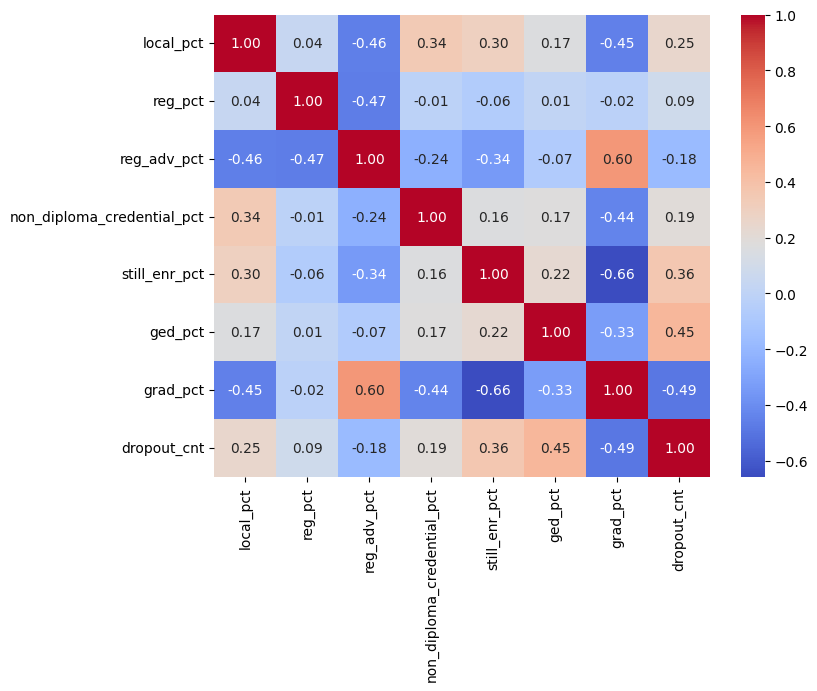

In [278]:
# Create new Dataframe with only diploma percentage data
dip= diplomas_percentage + ['grad_pct','dropout_cnt']
dip_data_pnt = df_cleaned[dip]

# Compute correlation matrix
corr_matrix = dip_data_pnt.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- After data preparation we can see some difference in collinearity

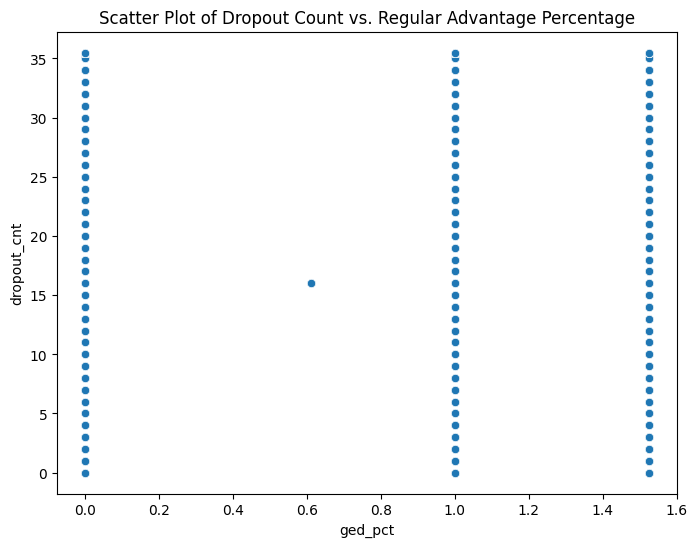

In [279]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ged_pct', y='dropout_cnt', data=df_cleaned)
plt.title('Scatter Plot of Dropout Count vs. Regular Advantage Percentage')
plt.show()

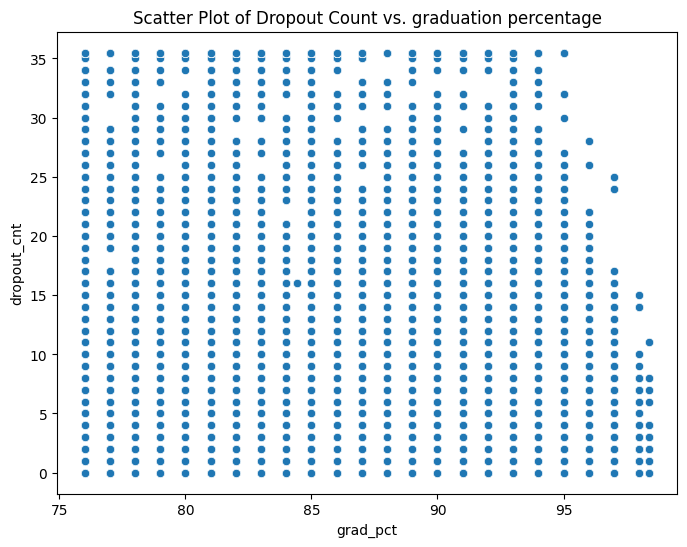

In [280]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grad_pct', y='dropout_cnt', data=df_cleaned)
plt.title('Scatter Plot of Dropout Count vs. graduation percentage')
plt.show()

- The data is scattered overall

## Feature Selection

- Using Variance threshold to eliminate columns with less variance

In [281]:
from sklearn.feature_selection import VarianceThreshold


# Initialize the VarianceThreshold with a threshold value (e.g., 0.1)
var_threshold = VarianceThreshold(threshold=0.1)

# Fit and transform the data to select columns with less variance
df_reduced = var_threshold.fit_transform(df_cleaned)

# Get the features that were retained
features_reduced = df_cleaned.columns[var_threshold.get_support(indices=True)]

# Create a new DataFrame with the retained features
df_reduced = pd.DataFrame(df_reduced, columns=features_reduced)

# Display the shape of the original and reduced DataFrames
print(f"Original shape: {df_cleaned.shape}")
print(f"Reduced shape: {df_reduced.shape}")


Original shape: (73152, 27)
Reduced shape: (73152, 26)


In [282]:
df_reduced.columns

Index(['nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')

- Checking for multicollinearity in dataset and droping the hightest multicollinear variable.

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
def calculate_vif(df):
  '''
      Calculates the Variance Inflation Factor (VIF) for each feature in a pandas DataFrame.
      Args :
      df: A pandas DataFrame containing the features.
      1
      Returns :
      A pandas DataFrame with the feature names and their corresponding VIF values, sorted in descending order of VIF.
  '''
  # Vlf dataframe
  vif_data = pd.DataFrame()
  # Calculate VIF for each feature
  vif_data['feature'] = df.columns
  vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  # Sort VIF in descending order
  vif_data = vif_data.sort_values(by='VIF', ascending=False)

  return vif_data


- Calculate VIF SCores and iteratively drop with VIF > 5

In [285]:


#iterate untill the highest VIF score is less than 5
count = 0
while calculate_vif(df_reduced)['VIF'][0] > 5:

  top_vif_feature = calculate_vif(df_reduced)['feature'][0]
  top_vif_score = round(calculate_vif(df_reduced)['VIF'][0],2)

  print(f"{top_vif_feature} : {top_vif_score}")

  df_reduced = df_reduced.drop(columns = top_vif_feature, axis = 1)
  count =  count + 1

if ~ count:
 print("There are no features with collinearity more than 5")

There are no features with collinearity more than 5


## Dimensionality Reduction

Principal Component Analysis

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [287]:
# Seperate featres and target
X = df_reduced.drop(columns=['dropout_cnt'])
y = df_reduced['dropout_cnt']


In [288]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (58521, 25)
X_test shape: (14631, 25)
y_train shape: (58521,)
y_test shape: (14631,)


In [290]:
# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA()

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[2.62937922e-01 1.45256336e-01 6.14375096e-02 5.69766182e-02
 4.86297933e-02 4.81273739e-02 4.79765490e-02 4.79350001e-02
 4.72459285e-02 4.23585877e-02 3.66942373e-02 3.61903726e-02
 2.90697722e-02 2.42315047e-02 2.37164053e-02 1.08037761e-02
 8.62032283e-03 6.28285930e-03 4.43927852e-03 3.79980381e-03
 3.34121572e-03 2.64349651e-03 1.12025699e-03 1.65080122e-04
 4.44610694e-17]


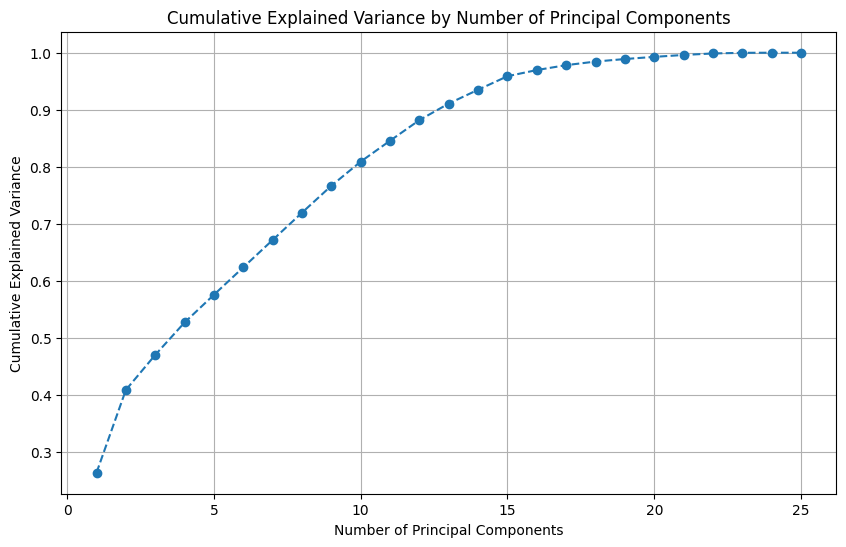

In [291]:
# Get cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

In [292]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)


In [293]:
df_reduced.drop(columns=['dropout_cnt']).columns

Index(['nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')

In [294]:
pca_data = pd.DataFrame(X_t_train, columns= df_reduced.drop(columns=['dropout_cnt']).columns)
pca_data.head()

,nrc_code,county_code,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,...,still_enr_pct,ged_cnt,ged_pct,dropout_pct,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019
0,-4.660230,1.752889,-0.067174,-0.734364,0.340078,0.527340,2.289482,-0.704544,-0.114836,-0.595664,...,0.096347,-0.852697,-0.329456,0.050139,-0.311371,-0.026965,-0.107154,0.087385,0.002078,1.019729e-15
1,-0.659636,1.313987,-2.384755,2.153013,-0.814079,1.812681,-0.993820,0.307301,-0.287075,-1.295159,...,-0.101947,0.153723,0.438887,-0.694876,-0.140090,-0.272499,0.159494,0.232342,0.005999,-3.125389e-16
2,-3.443531,3.649403,-0.166169,-0.730310,-0.540448,1.927504,-0.866535,0.356078,0.519876,-0.406915,...,-0.622422,-0.023450,0.116441,0.507103,0.327270,-0.013219,0.207644,0.079692,-0.017467,4.683465e-15
3,1.574793,-0.241727,-0.260031,-0.495981,0.259835,0.500241,2.265707,-0.681649,-0.214502,-0.244177,...,0.042201,0.091287,-0.015549,-0.019347,-0.003624,-0.032941,-0.003049,0.027450,0.006747,2.018929e-15
4,1.499745,-0.164757,-0.804513,-0.259675,-0.603195,1.845969,-0.857844,0.446172,0.168560,0.655652,...,0.141056,0.167641,-0.008963,0.017377,-0.009742,-0.055282,0.007930,0.025856,0.007004,3.240175e-15


#Regression Model

- Poisson Regression Models

In [295]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm

In [296]:
# features for model 1
X1 = pca_data[['nrc_code', 'county_code', 'subgroup_code']]

In [297]:
# Add a constant to the model (intercept)
X_train = sm.add_constant(X1)

# Align indices to ensure they match
X, y = X_train.align(y_train, join='inner', axis=0)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                46792
Model:                            GLM   Df Residuals:                    46788
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7783e+05
Date:                Mon, 14 Oct 2024   Deviance:                   3.8390e+05
Time:                        01:18:15   Pearson chi2:                 3.36e+05
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0002390
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4629      0.001   1825.372

In [298]:
# features for model 2
X2 = pca_data[['nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019']]

In [299]:
# Add a constant to the model (intercept)
X_train = sm.add_constant(X2)

# Align indices to ensure they match
X, y = X_train.align(y_train, join='inner', axis=0)

# Fit the Poisson regression model
poisson_model2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                46792
Model:                            GLM   Df Residuals:                    46767
Model Family:                 Poisson   Df Model:                           24
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7776e+05
Date:                Mon, 14 Oct 2024   Deviance:                   3.8377e+05
Time:                        01:18:15   Pearson chi2:                 3.36e+05
No. Iterations:                     6   Pseudo R-squ. (CS):           0.003052
Covariance Type:            nonrobust                                         
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

- Negative Binomial Models

In [300]:
from statsmodels.discrete.discrete_model import NegativeBinomial
import statsmodels.api as sm

In [301]:
X1 = pca_data[['nrc_code', 'county_code','membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019']]

In [302]:
# Add a constant to the model (intercept)
X = sm.add_constant(X1)
# Align indices to ensure they match
X, y = X.align(y_train, join='inner', axis=0)

neg_bi_1 = NegativeBinomial(endog=y, exog=X)
result = neg_bi_1.fit()

# Show summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 3.501736
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
                     NegativeBinomial Regression Results                      
Dep. Variable:            dropout_cnt   No. Observations:                46792
Model:               NegativeBinomial   Df Residuals:                    46783
Method:                           MLE   Df Model:                            8
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:               1.117e-05
Time:                        01:18:16   Log-Likelihood:            -1.6385e+05
converged:                       True   LL-Null:                   -1.6386e+05
Covariance Type:            nonrobust   LLR p-value:                    0.8864
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [303]:
# Features for second neg_bi model
X2 = pca_data[['grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019']]

In [304]:
# Add a constant to the model (intercept)
X = sm.add_constant(X2)
# Align indices to ensure they match
X, y = X.align(y_train, join='inner', axis=0)

neg_bi_2 = NegativeBinomial(endog=y, exog=X)
result_2 = neg_bi_2.fit()

# Show summary
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 3.501700
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
                     NegativeBinomial Regression Results                      
Dep. Variable:            dropout_cnt   No. Observations:                46792
Model:               NegativeBinomial   Df Residuals:                    46772
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:               2.153e-05
Time:                        01:18:18   Log-Likelihood:            -1.6385e+05
converged:                       True   LL-Null:                   -1.6386e+05
Covariance Type:            nonrobust   LLR p-value:                    0.9939
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

- Multiple Linear Regression Models

In [305]:
# Features for  linear model 1
X1 = pca_data[['nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',]]

In [306]:
# Add a constant to the model (intercept)
X_train = sm.add_constant(X1)

# Align indices to ensure they match
X, y = X_train.align(y_train, join='inner', axis=0)

# Fit the multiple linear regression model
mlr_model_1 = sm.OLS(y, X).fit()

# Print the model summary
print(mlr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8125
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.694
Time:                        01:18:18   Log-Likelihood:            -1.7011e+05
No. Observations:               46792   AIC:                         3.403e+05
Df Residuals:                   46772   BIC:                         3.404e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [307]:
pca_data.columns

Index(['nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')

In [308]:
X2 = pca_data[['nrc_code', 'county_code', 'subgroup_code','membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019']]

In [309]:
# Add a constant to the model (intercept)
X_train = sm.add_constant(X2)

# Align indices to ensure they match
X, y = X_train.align(y_train, join='inner', axis=0)

# Fit the multiple linear regression model
mlr_model_2 = sm.OLS(y, X).fit()

# Print the model summary
print(mlr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8429
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.565
Time:                        01:18:19   Log-Likelihood:            -1.7011e+05
No. Observations:               46792   AIC:                         3.402e+05
Df Residuals:                   46783   BIC:                         3.403e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

- From the Statistics metrics Poission Regression models and Negative Binomial models has similar chi2 scores.

- After considering the metrics like Deviance, R2, Log-Likelihood, AIC and BIC **Second model of Negative Binomial Regression (neg_bi_2) is showing better results**   than other model with R2: 3.839 and Log-Likelielyhood: -1.6385.

## Predections on Test Data

In [310]:
# Features for second neg_bi model
X2 = pca_data[['grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019']]

In [312]:
pred = result_2.predict(sm.add_constant(X2))

# round to int
pred = pred.round().astype(int)

# Ensure size of pred to y_test
pred = pred[:len(y_test)]



#Summary
print(result_2.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:            dropout_cnt   No. Observations:                46792
Model:               NegativeBinomial   Df Residuals:                    46772
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:               2.153e-05
Time:                        01:19:11   Log-Likelihood:            -1.6385e+05
converged:                       True   LL-Null:                   -1.6386e+05
Covariance Type:            nonrobust   LLR p-value:                    0.9939
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                2.4629        nan        nan     

## Coclusion:

- The distribution is changed after Data Preparation as we treated outliers, missing values, variance threshold and VIF.

- After evaluating different models we selected Negative Binomial Regressor which shows better statistics than other model and predected on test data where the R2 score: 2.15